# TAREA #3 Fundamentos de Aprendizaje Automático y Profundo
# Algoritmos Avanzados de Aprendizaje
**Estudiantes:**
*   Paula A. Paz 
*   Lizeth Tello 

**1.**Descargue la base de datos Breast Cancer Wisconsin (Diagnostic) y realice un análisis descriptivo de la información. Determine los elementos que mejor se correlacionan para identificar la presencia de cáncer benigno o maligno.

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
cancer = load_breast_cancer()
cancer.keys() # Expone las variables/propiedades de retorno de acuerdo a la descripción del dataset en Sklearn

print(cancer.DESCR) # Devuelve la descripción textual del dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
 
# Imprime la cantidad de dimesiones del arreglo
print("No. of dimensions X: ", X.ndim)
print("No. of dimensions y: ", y.ndim)
 
# Imprime los valores de las dimensiones 
print("Shape of array X: ", X.shape)
print("Shape of array y: ", y.shape)

# Imprime el numero total de datos que tiene el arreglo
print("Size of array X: ", X.size)
print("Size of array y: ", y.size)
 
# Imprime el tipo de datos que contiene el arreglo
print("Array stores elements of type X: ", X.dtype)
print("Array stores elements of type y: ", y.dtype)

No. of dimensions X:  2
No. of dimensions y:  1
Shape of array X:  (569, 30)
Shape of array y:  (569,)
Size of array X:  17070
Size of array y:  569
Array stores elements of type X:  float64
Array stores elements of type y:  int64


In [ ]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']],columns = np.append(cancer['feature_names'], ['target'])) #
df_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

KeyboardInterrupt: ignored

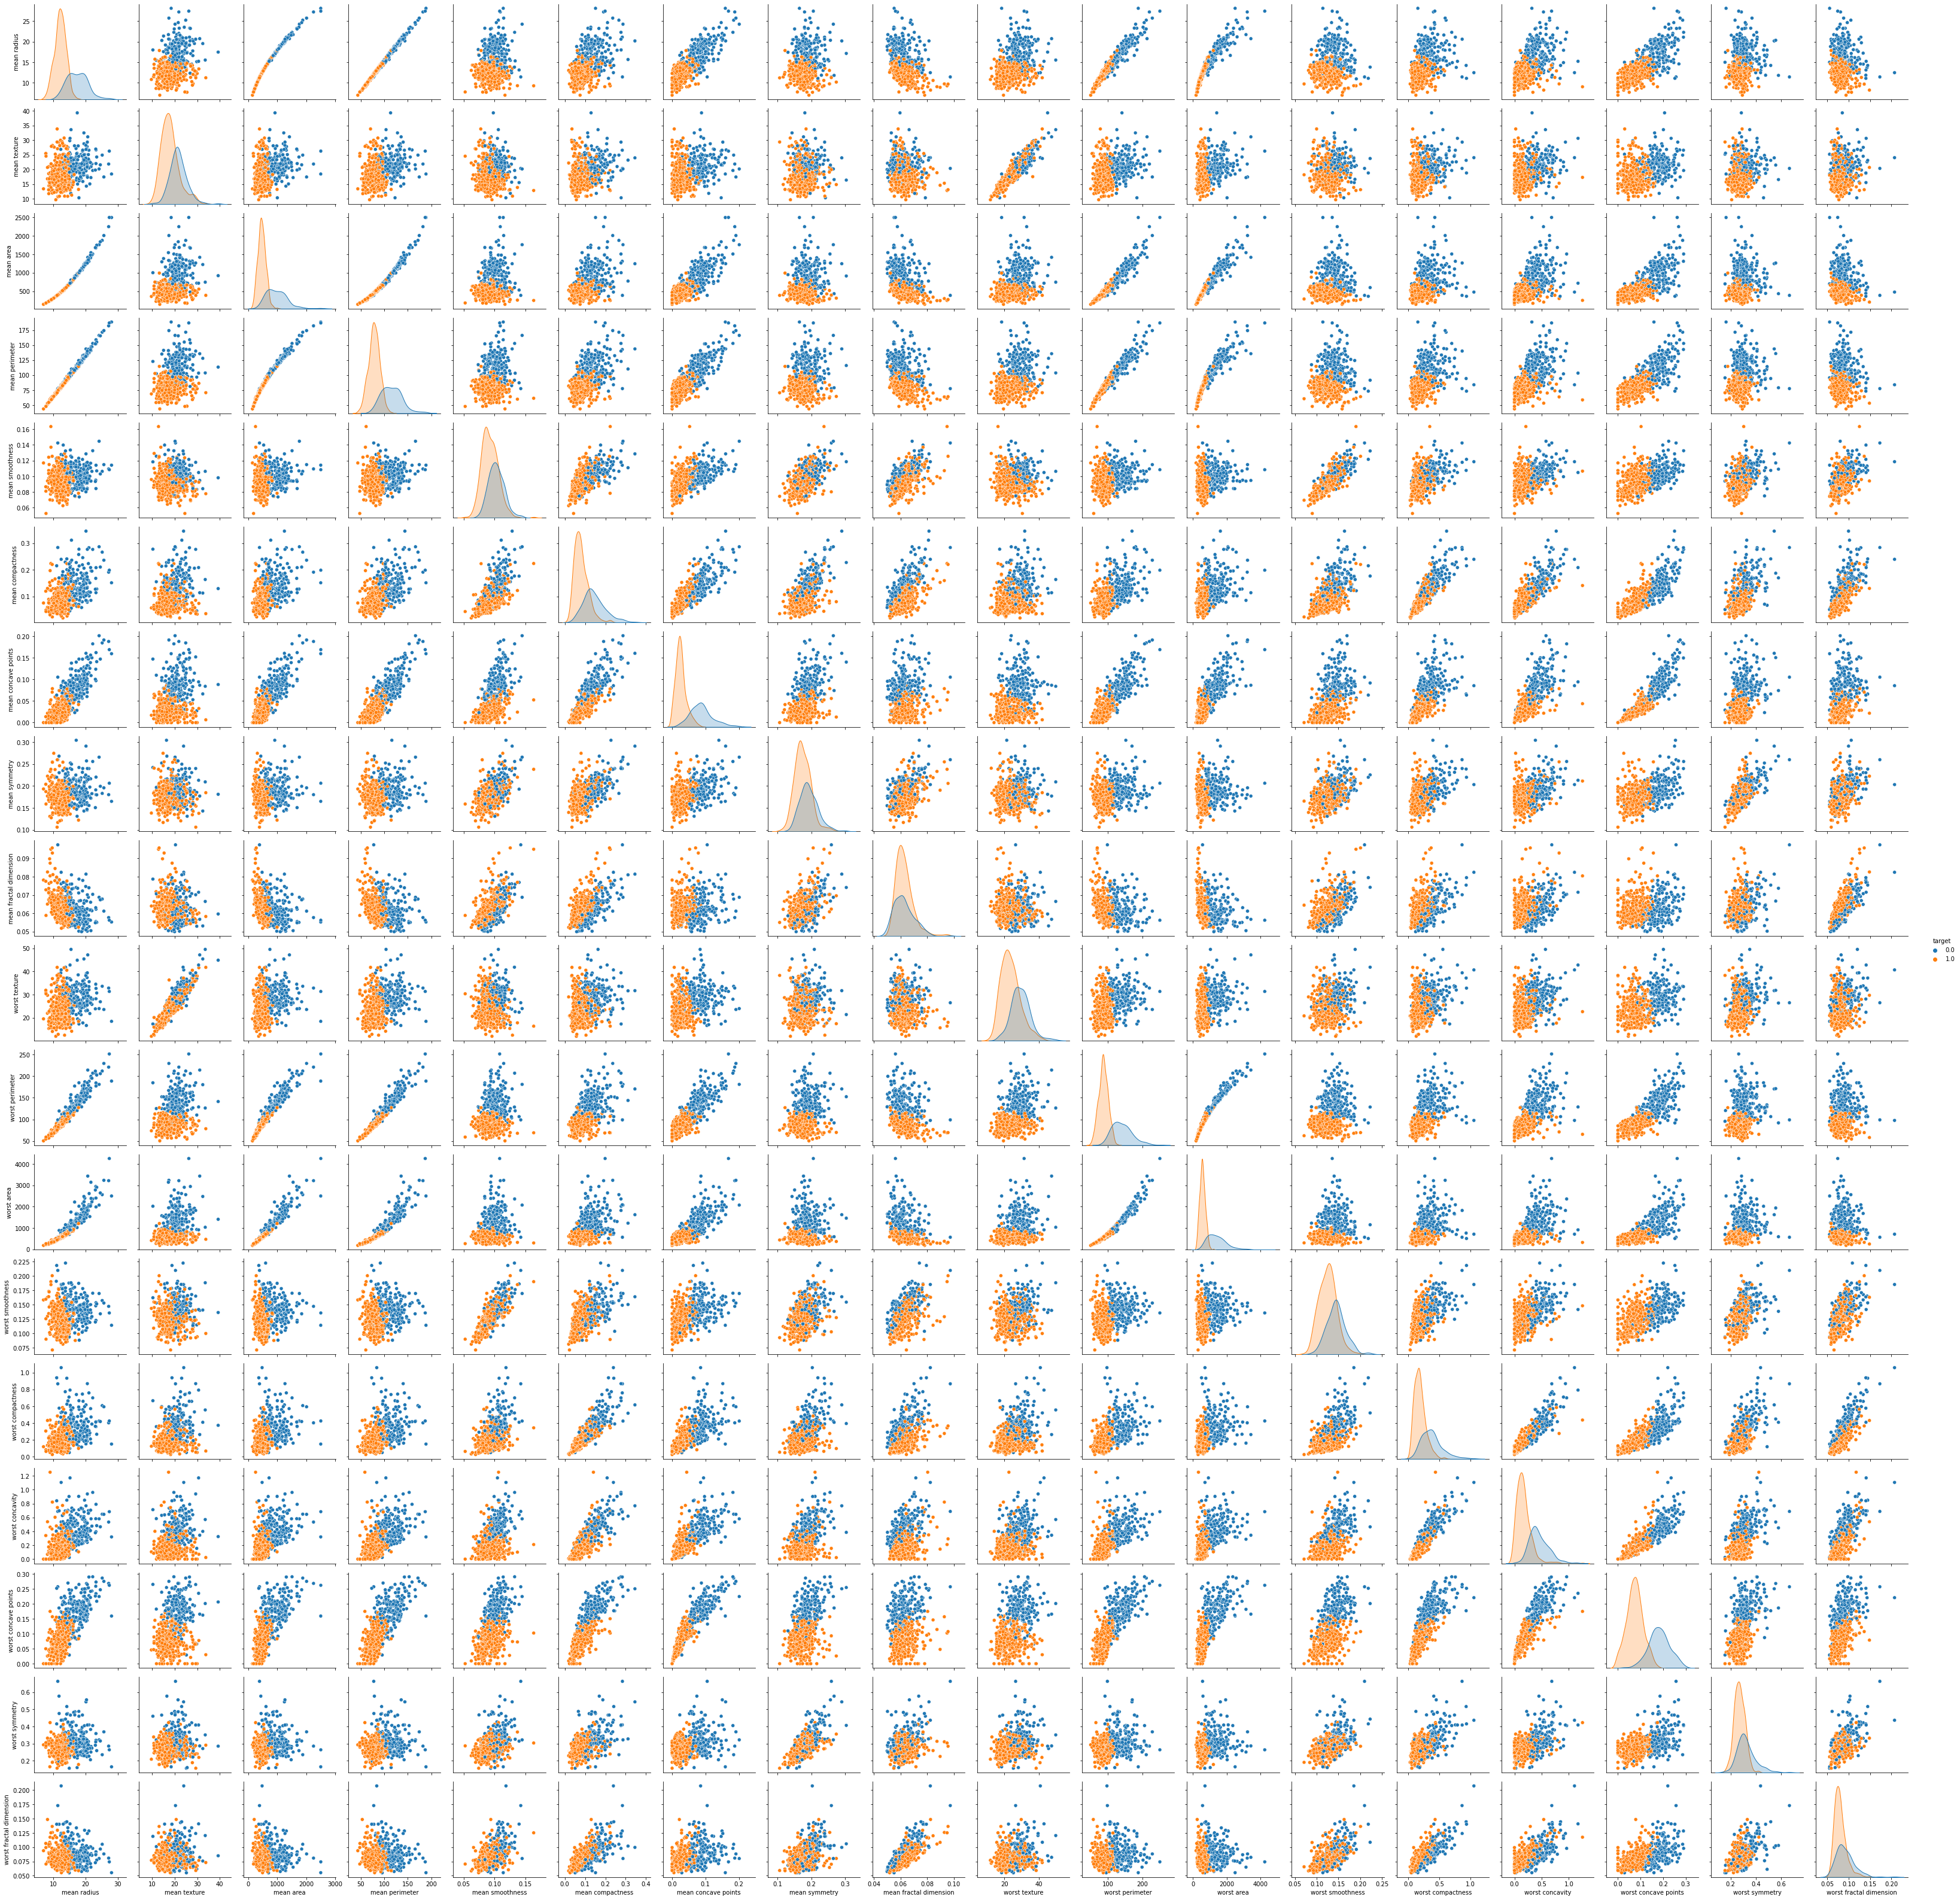

In [ ]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness', 'mean compactness','mean concave points',	'mean symmetry',	'mean fractal dimension','worst texture',	'worst perimeter',	'worst area',	'worst smoothness',	'worst compactness',	'worst concavity',	'worst concave points',	'worst symmetry',	'worst fractal dimension'])

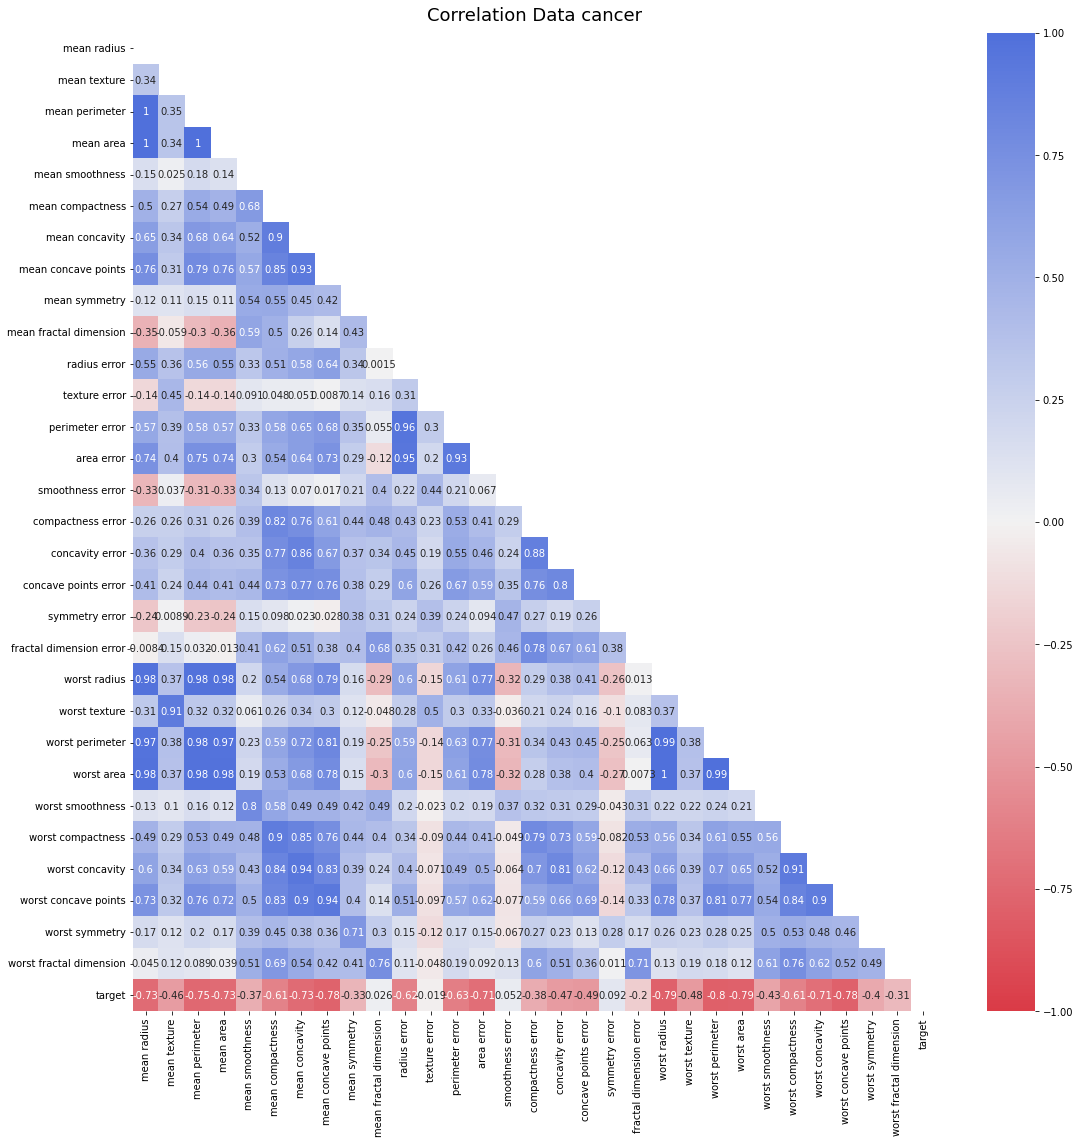

In [ ]:
#Correlación entre covariables
corr_matrix = df_cancer.corr(method='spearman')

plt.figure(figsize=(18, 18))
#sns.heatmap(df_cancer.corr(), annot=True)
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(10, 260, as_cmap=True)
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, cmap=cmap, annot=True)
heatmap.set_title('Correlation Data cancer', fontdict={'fontsize':18}, pad=12);

Los elementos que mejor se correlacionan para determinar el cancer benigno o maligno, son: el mean compactheness con worst smootheness,worst concavity compactheness error, entre otras; pero dado la cantidad de información se decidió analizar los graficos de las caracteristicas para analizar los que separaban con una buena distribución la información y de esto se escogió las caracteristicas como median radius, median perimeter, worst concave points, worst concavity, worst area y worst perimeter.

In [ ]:
#Seleccionando todos las características
X = df_cancer.drop('target',axis=1)
y = df_cancer['target']

X.head()
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


**2.** Realice el mismo ejercicio usando XGBoost y determine las características dominantes para la identificación de cáncer.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train,y_train)
print(xgb_clf)

XGBClassifier()


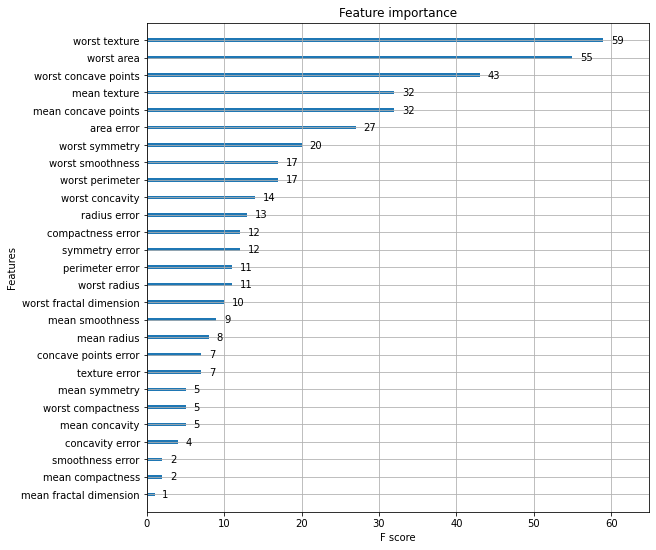

In [ ]:

%matplotlib inline

plt.figure(figsize= (9,9))
xgb.plot_importance(xgb_clf,ax=plt.gca())

Las características dominantes para clasificar cáncer según XGBoost son : worst texture, area error, worst area, worst concavity, mean texture. Estas fueron las escogidas para ser empleadas en la clasificación.

In [ ]:
predic = xgb_clf.predict(x_test)
xgb_clf.score(x_train, y_train) ## accuracy

1.0

In [ ]:
pred_train = xgb_clf.predict(x_train)

In [ ]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 267]])

**3.** Construya métodos ensamblados basados en AdaBoost con los algoritmos Random Forest, XGBoost y Redes Neuronales Artificiales usando el conjunto de características obtenidas en (1) y (2). No olvide separar el conjunto de datos para entrenamiento y prueba (70% y 30%,respectivamente).

In [ ]:
#Características seleccionadas según análisis descriptivo (punto 1)
X_3 = df_cancer[['mean radius', 'mean perimeter', 'worst concave points', 'worst concavity', 'worst area', 'worst perimeter']]
y_3 = df_cancer['target']
X_3.head()

mean radius  mean perimeter  worst concave points  worst concavity  \
0        17.99          122.80                0.2654           0.7119   
1        20.57          132.90                0.1860           0.2416   
2        19.69          130.00                0.2430           0.4504   
3        11.42           77.58                0.2575           0.6869   
4        20.29          135.10                0.1625           0.4000   

   worst area  worst perimeter  
0      2019.0           184.60  
1      1956.0           158.80  
2      1709.0           152.50  
3       567.7            98.87  
4      1575.0           152.20

In [ ]:
#Características seleccionadas según XGBoost (punto 2)
X_2 = df_cancer[['worst texture', 'area error', 'worst area', 'worst concavity', 'mean texture']]
y_2 = df_cancer['target']
X_2.head()


worst texture  area error  worst area  worst concavity  mean texture
0          17.33      153.40      2019.0           0.7119         10.38
1          23.41       74.08      1956.0           0.2416         17.77
2          25.53       94.03      1709.0           0.4504         21.25
3          26.50       27.23       567.7           0.6869         20.38
4          16.67       94.44      1575.0           0.4000         14.34

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier

**AdaBoost + Random Forest para características seleccionadas por método XGBoost (punto 2)** 

https://www.kaggle.com/code/alexander85/heart-disease-adaboost-w-different-base-estimators/notebook

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.30, stratify=y, random_state=0)
print('Label shape:    {}'.format(X_train_2.shape))
print('Features shape: {}'.format(y_train_2.shape))

Label shape:    (398, 5)
Features shape: (398,)


In [ ]:
cls = RandomForestClassifier(n_estimators=500)
estimators = 100 # El número de estimadores es menor

model_RF = AdaBoostClassifier(base_estimator = cls,
                          n_estimators = estimators,
                          learning_rate=0.01,
                          algorithm = 'SAMME',
                          random_state = 8).fit(X_train_2, y_train_2)
print('La exactitud promedio del algoritmo Random Forest usando {0} estimadores es: {1}'.
      format(estimators,model_RF.score(X_train_2, y_train_2)))
print('Con los datos de prueba el resultado es:',model_RF.score(X_test_2, y_test_2))

La exactitud promedio del algoritmo Random Forest usando 100 estimadores es: 1.0
Con los datos de prueba el resultado es: 0.9415204678362573


In [ ]:
pred_train_RF = model_RF.predict(X_train_2)
conf_matr_RF= confusion_matrix(y_train_2,pred_train_RF)
conf_matr_RF

array([[148,   0],
       [  0, 250]])

**AdaBoost + XGBoost para características seleccionadas por método XGBoost (punto 2)**



In [ ]:
xgb_clf = XGBClassifier()
estimators = 4 # El número de estimadores es menor

model = AdaBoostClassifier(base_estimator = xgb_clf,
                          n_estimators = estimators,
                          algorithm = 'SAMME',
                          random_state = 8).fit(X_train_2, y_train_2)
print('La exactitud promedio del algoritmo XGBoost usando {0} estimadores es: {1}'.
      format(estimators,model.score(X_train_2, y_train_2)))
print('Con los datos de prueba el resultado es:',model.score(X_test_2, y_test_2))

La exactitud promedio del algoritmo XGBoost usando 4 estimadores es: 0.628140703517588
Con los datos de prueba el resultado es: 0.6257309941520468


In [ ]:
pred_train = model.predict(X_train_2)
conf_matr= confusion_matrix(y_train_2,pred_train)
conf_matr

array([[  0, 148],
       [  0, 250]])

**AdaBoost + Redes Neuronales para características seleccionadas por método XGBoost (punto 2)**
https://stackoverflow.com/questions/18306416/adaboostclassifier-with-different-base-learners

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [ ]:
classifier = AdaBoostClassifier(base_estimator=Perceptron(), n_estimators=15, algorithm='SAMME')
classifier = classifier.fit(X_train_2, y_train_2)
y_pred = classifier.predict(X_test_2)
AdaBoost_accuracy = metrics.accuracy_score(y_test_2, y_pred)
print("Accuracy of AdaBoost:", AdaBoost_accuracy)

Accuracy of AdaBoost: 0.7076023391812866


**AdaBoost + Random Forest para características seleccionadas por método estadística descriptiva (punto 1)**

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.30, stratify=y, random_state=0)
print('Label shape:    {}'.format(X_train_2.shape))
print('Features shape: {}'.format(y_train_2.shape))

Label shape:    (398, 5)
Features shape: (398,)


In [ ]:
cls = RandomForestClassifier(n_estimators=500)
estimators = 100 # El número de estimadores es menor

model_RF = AdaBoostClassifier(base_estimator = cls,
                          n_estimators = estimators,
                          learning_rate=0.01,
                          algorithm = 'SAMME',
                          random_state = 8).fit(X_train_3, y_train_3)
print('La exactitud promedio del algoritmo Random Forest usando {0} estimadores es: {1}'.
      format(estimators,model_RF.score(X_train_3, y_train_3)))
print('Con los datos de prueba el resultado es:',model_RF.score(X_test_3, y_test_3))

La exactitud promedio del algoritmo Random Forest usando 100 estimadores es: 1.0
Con los datos de prueba el resultado es: 0.9239766081871345


In [ ]:
pred_train_RF = model_RF.predict(X_train_3)
conf_matr_RF= confusion_matrix(y_train_3,pred_train_RF)
conf_matr_RF

array([[148,   0],
       [  0, 250]])

**AdaBoost + XGBoost para características seleccionadas por método estadistica descriptiva (punto 1)**

In [ ]:
xgb_clf = XGBClassifier()
estimators = 4 # El número de estimadores es menor

model = AdaBoostClassifier(base_estimator = xgb_clf,
                          n_estimators = estimators,
                          algorithm = 'SAMME',
                          random_state = 8).fit(X_train_3, y_train_3)
print('La exactitud promedio del algoritmo XGBoost usando {0} estimadores es: {1}'.
      format(estimators,model.score(X_train_3, y_train_3)))
print('Con los datos de prueba el resultado es:',model.score(X_test_3, y_test_3))

La exactitud promedio del algoritmo XGBoost usando 4 estimadores es: 0.628140703517588
Con los datos de prueba el resultado es: 0.6257309941520468


In [ ]:
pred_train = model.predict(X_train_3)
conf_matr= confusion_matrix(y_train_3,pred_train)
conf_matr

array([[  0, 148],
       [  0, 250]])

**AdaBoost + Redes Neuronales para características seleccionadas por método estadistica descriptiva (punto 1)**

In [ ]:
classifier = AdaBoostClassifier(base_estimator=Perceptron(), n_estimators=15, algorithm='SAMME')
classifier = classifier.fit(X_train_3, y_train_3)
y_pred = classifier.predict(X_test_3)
AdaBoost_accuracy = metrics.accuracy_score(y_test_3, y_pred)
print("Accuracy of AdaBoost with Perceptron:", AdaBoost_accuracy)

Accuracy of AdaBoost with Perceptron: 0.8947368421052632


**ANÁLISIS:**

Al comparar los diferentes métodos con el AdaBoost, se encontró que este método presentó mejores resultados con el **Random Forest**. 

El clasificador  **AdaBoost + Random Forest** obtuvo exactitudes superiores al 90% en la clasificación con los datos de prueba. Esto se hizo para las caracteristicas seleccionadas por estadistica descriptiva y XGBoost; donde se encontró que las caracteristicas obtenidas del XGBoost, obtuvieron mejores resultados en la clasificación con los datos de prueba con un 94.15%. Mientras que las caracterisicas obtenidas del analisis estadistico obtuvieron en la clasificación 92.39% de exactitud. 

Para el caso de **AdaBoost + XGBoost** los resultados de exactitud del clasificador son de ~60% para ambos conjuntos de características, sin embargo la matriz de confusión presenta todos los datos como 1. Por lo que este tipo de ensamblado no obtiene resultados correctamente clasificados. Realizando una búsqueda de los tipos de clasificadores soportado por función **AdaBoostClassifier** no se encuentra catalogado el XGBoost, los métodos más comunes son DecisionTreeClassifier, RandomForest, SVM, Perceptron, entre otros (https://stackoverflow.com/questions/18306416/adaboostclassifier-with-different-base-learners). 

Para el método de **AdaBoost + Redes Neuronales** se obtuvieron exactitudes de 89% con las caracteristicas seleccionadas del análisis descriptivo y 70% con las caracteristicas seleccionadas por el XGBoost.

**4.**Utilice 5-fold cross-validation para seleccionar el conjunto de modelos usando diferentes hiperparámetros por algoritmo (incluya regularización). No olvide que el desempeño podría deteriorarse durante el proceso de aprendizaje pero compensado su capacidad de generalización.

**Características seleccionadas según XGBoost**

**Random Forest**

In [ ]:
# Finding the best hyperparameters Random Forest
params = { 
    'n_estimators': [200, 500],
    'max_leaf_nodes':[16,20],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(
				estimator = RandomForestClassifier(),
				param_grid = params,
				cv = 5,
				n_jobs = -1,
				verbose = True,
        scoring='accuracy')

clf.fit(X_train_2, y_train_2)
print(clf.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 16, 'n_estimators': 200}


In [ ]:
resultados = pd.DataFrame(clf.cv_results_)
resultados.filter(regex = '(param*|mean_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

param_criterion param_max_depth param_max_leaf_nodes param_n_estimators  \
12            gini               7                   16                200   
20         entropy               4                   16                200   
18            gini               8                   20                200   
16            gini               8                   16                200   
14            gini               7                   20                200   
17            gini               8                   16                500   
0             gini               4                   16                200   
5             gini               5                   16                500   
31         entropy               6                   20                500   
26         entropy               5                   20                200   

    mean_test_score  
12         0.967405  
20         0.964905  
18         0.964905  
16         0.964905  
14         0.964905  
17         0.964873  
0          0.964873  
5          0.964873  
31         0.962405  
26         0.962405

In [ ]:
#Random Forest con best params
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, criterion='gini', max_depth= 7,n_jobs=-1)
#train dataset
rnd_clf.fit(X_train_2, y_train_2)
R2train = rnd_clf.score(X_train_2,y_train_2)
#test dataset
y_predict_rf = rnd_clf.predict(X_test_2)
R2test =  rnd_clf.score(X_test_2,y_test_2)

print('Los coeficientes de determinación para entrenamiento y prueba son:{0} y {1}'.
      format(R2train,R2test))
rnd_clf

Los coeficientes de determinación para entrenamiento y prueba son:0.9974874371859297 y 0.9473684210526315


RandomForestClassifier(max_depth=7, max_leaf_nodes=16, n_estimators=200,
                       n_jobs=-1)

In [ ]:
conf_matr= confusion_matrix(y_test_2,y_predict_rf)
conf_matr

array([[ 60,   4],
       [  5, 102]])

**XGBoost**

In [ ]:
# Finding the best hyperparameters XGBoost


params = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.01, 0.05, 0.07], #so called `eta` value
              'max_depth': [6, 10, 20],
              'min_child_weight': [11, 20, 30],
              'silent': [1],
              'subsample': [0.5,0.8],
              'colsample_bytree': [0.7, 1],
              'n_estimators': [5, 20], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1000, 2000]}

clf_xgb = GridSearchCV(
				estimator = xgb.XGBClassifier(),
				param_grid = params,
				cv = 5,
				n_jobs = -1,
				verbose = True,
        scoring='accuracy')

clf_xgb.fit(X_train_2, y_train_2)
print(clf_xgb.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 20, 'missing': -999, 'n_estimators': 20, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1000, 'silent': 1, 'subsample': 0.5}


In [ ]:
resultados = pd.DataFrame(clf_xgb.cv_results_)
resultados.filter(regex = '(param*|mean_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

param_colsample_bytree param_learning_rate param_max_depth  \
180                    0.7                0.07              10   
156                    0.7                0.07               6   
204                    0.7                0.07              20   
14                     0.7                0.01               6   
62                     0.7                0.01              20   
38                     0.7                0.01              10   
389                      1                0.07              10   
396                      1                0.07              10   
372                      1                0.07               6   
199                    0.7                0.07              20   

    param_min_child_weight param_missing param_n_estimators param_nthread  \
180                     20          -999                 20             4   
156                     20          -999                 20             4   
204                     20          -999                 20             4   
14                      20          -999                 20             4   
62                      20          -999                 20             4   
38                      20          -999                 20             4   
389                     11          -999                 20             4   
396                     20          -999                 20             4   
372                     20          -999                 20             4   
199                     11          -999                 20             4   

     param_objective param_seed param_silent param_subsample  mean_test_score  
180  binary:logistic       1000            1             0.5         0.944842  
156  binary:logistic       1000            1             0.5         0.944842  
204  binary:logistic       1000            1             0.5         0.944842  
14   binary:logistic       2000            1             0.5         0.937342  
62   binary:logistic       2000            1             0.5         0.937342  
38   binary:logistic       2000            1             0.5         0.937342  
389  binary:logistic       1000            1             0.8         0.937310  
396  binary:logistic       1000            1             0.5         0.937310  
372  binary:logistic       1000            1             0.5         0.937310  
199  binary:logistic       2000            1             0.8         0.937310

In [ ]:
#XGBOOST con best params
xgb_clf = xgb.XGBClassifier(nthread=4, #when use hyperthread, xgboost may become slower
              objective='binary:logistic',
              learning_rate= 0.07, #so called `eta` value
              max_depth= 6, 
              min_child_weight= 20, #for splitting
              silent= 1,
              subsample= 0.5, # is boostrapping the training sample
              colsample_bytree= 0.7,
              n_estimators= 20, #number of trees, change it to 1000 for better results
              missing=-999,
              seed=1000)
#train dataset
xgb_clf.fit(X_train_2, y_train_2)
R2train = xgb_clf.score(X_train_2,y_train_2)
#test dataset
y_predict_xgb = xgb_clf.predict(X_test_2)
R2test =  xgb_clf.score(X_test_2,y_test_2)

print('Los coeficientes de determinación para entrenamiento y prueba son:{0} y {1}'.
      format(R2train,R2test))
xgb_clf

Los coeficientes de determinación para entrenamiento y prueba son:0.9296482412060302 y 0.8947368421052632


XGBClassifier(colsample_bytree=0.7, learning_rate=0.07, max_depth=6,
              min_child_weight=20, missing=-999, n_estimators=20, nthread=4,
              seed=1000, silent=1, subsample=0.5)

In [ ]:
conf_matr= confusion_matrix(y_test_2,y_predict_xgb)
conf_matr

array([[57,  7],
       [11, 96]])

**Redes neuronales configuración 1: Regularización Dropout**

In [ ]:
#Redes Neuronales
# import the libraries
from tensorflow import keras
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier 
from tensorflow.keras import layers, initializers, optimizers, regularizers

In [ ]:
def build_clf(unit):
# creating the layers of the NN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(layers.Dropout(rate=0.14))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(layers.Dropout(rate=0.14))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(layers.Dropout(rate=0.14))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(layers.Dropout(rate=0.14))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'Adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann

In [ ]:
model=KerasClassifier(build_fn=build_clf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
params={'batch_size':[100, 50, 20], #tamano batch
		'nb_epoch':[200,300, 350, 400, 500], #número de iteraciones
		'unit':[5,6,10,15], #número de neuronas
		}
gs=GridSearchCV(estimator=model, param_grid=params, cv=5)
# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X_train_2, y_train_2)

4/4 [==============================] - 1s 3ms/step - loss: 19.9192 - accuracy: 0.5078


4/4 [==============================] - 1s 4ms/step - loss: 52.8355 - accuracy: 0.5220


20/20 [==============================] - 1s 2ms/step - loss: 10.2046 - accuracy: 0.4623


In [ ]:
best_params=gs.best_params_
accuracy=gs.best_score_

In [ ]:
best_params

{'batch_size': 20, 'nb_epoch': 300, 'unit': 10}

In [ ]:
accuracy

0.6379113912582397

In [ ]:
#Red con parámetros ajustados
clf = KerasClassifier(build_fn=build_clf, epochs=300, batch_size=20, unit=10, verbose=0)
clf.fit(X_train_2, y_train_2)
clf.score(X_train_2, y_train_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


0.8442211151123047

**Redes neuronales configuración 2: con Regularización L1**

In [ ]:
# L1 regularization
regularizer = regularizers.L1(0.0001)

def build_clf2(unit):
# creating the layers of the NN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu',kernel_regularizer=regularizer))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu', kernel_regularizer=regularizer))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu', kernel_regularizer=regularizer))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu', kernel_regularizer=regularizer))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'RMSProp',loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann

In [ ]:
model2=KerasClassifier(build_fn=build_clf2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
params={'batch_size':[100, 50, 20], #tamano batch
		'nb_epoch':[200,300, 350, 400, 500], #número de iteraciones
		'unit':[5,6,10,15], #número de neuronas
		}
gs=GridSearchCV(estimator=model2, param_grid=params, cv=5)
# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X_train_2, y_train_2)

4/4 [==============================] - 1s 5ms/step - loss: 12.3260 - accuracy: 0.6281


In [ ]:
best_params=gs.best_params_
accuracy=gs.best_score_

In [ ]:
best_params

{'batch_size': 100, 'nb_epoch': 350, 'unit': 5}

In [ ]:
accuracy

0.6231012582778931

In [ ]:
#Red con parámetros ajustados
clf2 = KerasClassifier(build_fn=build_clf2, epochs=350, batch_size=100, unit=5, verbose=0)
clf2.fit(X_train_2, y_train_2)
clf2.score(X_train_2, y_train_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


0.9020100235939026

**Características seleccionadas según estadistica descriptiva**

**Random Forest**

In [ ]:
# Finding the best hyperparameters Random Forest
params = { 
    'n_estimators': [200, 500],
    'max_leaf_nodes':[16,20],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(
				estimator = RandomForestClassifier(),
				param_grid = params,
				cv = 5,
				n_jobs = -1,
				verbose = True,
        scoring='accuracy')

clf.fit(X_train_3, y_train_3)
print(clf.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 16, 'n_estimators': 200}


In [ ]:
resultados = pd.DataFrame(clf.cv_results_)
resultados.filter(regex = '(param*|mean_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

param_criterion param_max_depth param_max_leaf_nodes param_n_estimators  \
34         entropy               7                   20                200   
28         entropy               6                   16                200   
39         entropy               8                   20                500   
17            gini               8                   16                500   
37         entropy               8                   16                500   
35         entropy               7                   20                500   
27         entropy               5                   20                500   
10            gini               6                   20                200   
25         entropy               5                   16                500   
36         entropy               8                   16                200   

    mean_test_score  
34         0.954778  
28         0.954778  
39         0.952278  
17         0.952278  
37         0.952278  
35         0.952278  
27         0.952278  
10         0.952278  
25         0.952278  
36         0.952247

In [ ]:
#Random Forest con best params
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, criterion='entropy', max_depth= 6,n_jobs=-1)
#train dataset
rnd_clf.fit(X_train_3, y_train_3)
R2train = rnd_clf.score(X_train_3,y_train_3)
#test dataset
y_predict_rf = rnd_clf.predict(X_test_3)
R2test =  rnd_clf.score(X_test_3,y_test_3)

print('Los coeficientes de determinación para entrenamiento y prueba son:{0} y {1}'.
      format(R2train,R2test))
rnd_clf

Los coeficientes de determinación para entrenamiento y prueba son:1.0 y 0.9473684210526315


RandomForestClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=16,
                       n_estimators=200, n_jobs=-1)

**XGBOOST**

In [ ]:
#Finding the best hyperparameters XGBoost


params = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.01, 0.05, 0.07], #so called `eta` value
              'max_depth': [6, 10, 20],
              'min_child_weight': [11, 20, 30],
              'silent': [1],
              'subsample': [0.5,0.8],
              'colsample_bytree': [0.7, 1],
              'n_estimators': [5, 20], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1000, 2000]}

clf_xgb = GridSearchCV(
				estimator = xgb.XGBClassifier(),
				param_grid = params,
				cv = 5,
				n_jobs = -1,
				verbose = True,
        scoring='accuracy')

clf_xgb.fit(X_train_3, y_train_3)
print(clf_xgb.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 20, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 2000, 'silent': 1, 'subsample': 0.8}


In [ ]:
resultados = pd.DataFrame(clf_xgb.cv_results_)
resultados.filter(regex = '(param*|mean_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

param_colsample_bytree param_learning_rate param_max_depth  \
199                    0.7                0.07              20   
151                    0.7                0.07               6   
175                    0.7                0.07              10   
198                    0.7                0.07              20   
150                    0.7                0.07               6   
174                    0.7                0.07              10   
144                    0.7                0.07               6   
168                    0.7                0.07              10   
192                    0.7                0.07              20   
78                     0.7                0.05               6   

    param_min_child_weight param_missing param_n_estimators param_nthread  \
199                     11          -999                 20             4   
151                     11          -999                 20             4   
175                     11          -999                 20             4   
198                     11          -999                 20             4   
150                     11          -999                 20             4   
174                     11          -999                 20             4   
144                     11          -999                  5             4   
168                     11          -999                  5             4   
192                     11          -999                  5             4   
78                      11          -999                 20             4   

     param_objective param_seed param_silent param_subsample  mean_test_score  
199  binary:logistic       2000            1             0.8         0.937278  
151  binary:logistic       2000            1             0.8         0.937278  
175  binary:logistic       2000            1             0.8         0.937278  
198  binary:logistic       2000            1             0.5         0.937278  
150  binary:logistic       2000            1             0.5         0.937278  
174  binary:logistic       2000            1             0.5         0.937278  
144  binary:logistic       1000            1             0.5         0.934778  
168  binary:logistic       1000            1             0.5         0.934778  
192  binary:logistic       1000            1             0.5         0.934778  
78   binary:logistic       2000            1             0.5         0.934715

In [ ]:
#XGBOOST con best params
xgb_clf = xgb.XGBClassifier(nthread=4, #when use hyperthread, xgboost may become slower
              objective='binary:logistic',
              learning_rate= 0.07, #so called `eta` value
              max_depth= 6, 
              min_child_weight= 11, #for splitting
              silent= 1,
              subsample= 0.8, # is boostrapping the training sample
              colsample_bytree= 0.7,
              n_estimators= 20, #number of trees, change it to 1000 for better results
              missing=-999,
              seed=2000)
#train dataset
xgb_clf.fit(X_train_3, y_train_3)
R2train = xgb_clf.score(X_train_3,y_train_3)
#test dataset
y_predict_xgb = xgb_clf.predict(X_test_3)
R2test =  xgb_clf.score(X_test_3,y_test_3)

print('Los coeficientes de determinación para entrenamiento y prueba son:{0} y {1}'.
      format(R2train,R2test))
xgb_clf

Los coeficientes de determinación para entrenamiento y prueba son:0.9597989949748744 y 0.9181286549707602


XGBClassifier(colsample_bytree=0.7, learning_rate=0.07, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=20, nthread=4,
              seed=2000, silent=1, subsample=0.8)

In [ ]:
conf_matr= confusion_matrix(y_test_3,y_predict_xgb)
conf_matr

array([[58,  6],
       [ 8, 99]])

****Redes neuronales configuración 1: Regularización Dropout****

In [ ]:
params={'batch_size':[100, 50, 20], #tamano batch
		'nb_epoch':[200,300, 350, 400, 500], #número de iteraciones
		'unit':[5,6,10,15], #número de neuronas
		}
gs=GridSearchCV(estimator=model, param_grid=params, cv=5)
# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X_train_3, y_train_3)

8/8 [==============================] - 1s 4ms/step - loss: 14.0435 - accuracy: 0.4774


In [ ]:
best_params=gs.best_params_
accuracy=gs.best_score_

In [ ]:
best_params

{'batch_size': 50, 'nb_epoch': 300, 'unit': 15}

In [ ]:
accuracy

0.6563607633113862

In [ ]:
#Red con parámetros ajustados
clf = KerasClassifier(build_fn=build_clf, epochs=300, batch_size=50, unit=15, verbose=0)
clf.fit(X_train_3, y_train_3)
clf.score(X_train_3, y_train_3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


0.6281406879425049

**Redes neuronales configuración 2: con Regularización L1**

In [ ]:
params={'batch_size':[100, 50, 20], #tamano batch
		'nb_epoch':[200,300, 350, 400, 500], #número de iteraciones
		'unit':[5,6,10,15], #número de neuronas
		}
gs=GridSearchCV(estimator=model2, param_grid=params, cv=5)
# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X_train_3, y_train_3)

20/20 [==============================] - 1s 2ms/step - loss: 14.7182 - accuracy: 0.6030


In [ ]:
best_params=gs.best_params_
accuracy=gs.best_score_

In [ ]:
best_params

{'batch_size': 20, 'nb_epoch': 300, 'unit': 15}

In [ ]:
accuracy

0.8493354439735412

In [ ]:
#Red con parámetros ajustados
clf2 = KerasClassifier(build_fn=build_clf2, epochs=300, batch_size=20, unit=15, verbose=0)
clf2.fit(X_train_3, y_train_3)
clf2.score(X_train_3, y_train_3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


0.9346733689308167

**Análisis**

*Caracteristicas seleccionadas por XGBoost:* 

*   Random Forest: Los coeficientes de determinación para entrenamiento y prueba son:99.748% y 94.736%
*   XGBoost: Los coeficientes de determinación para entrenamiento y prueba son:92.964% y 89.4736%
*   Redes Neuronales con Dropout, optimizador Adam: 84.422% 
*   Redes Neuronales con L1, optimizador 'RMSProp: 90.201% 

*Caracteristicas seleccionadas por análisis descriptivo:*
*   Random Forest: Los coeficientes de determinación para entrenamiento y prueba son:100% y 94.736%
*   XGBoost: Los coeficientes de determinación para entrenamiento y prueba son:95.979% y 91.812%
*   Redes Neuronales con Dropout, optimizador Adam: 62.814%
*   Redes Neuronales con L1, optimizador 'RMSProp: 93.46%

Para el caso de las redes neuronales se realizaron dos configuraciones empleando la regularizacion L1 y Dropout, las cuales son las empleadas debido a sus buenos resultados para evitar el sobre ajuste de los datos de entrenamiento. Se emplearon los optimizadores Adam y el RMSProp los cuales convergen más rapido y minimizan la función de costo. Se variaron el número de iteraciones, el número de neuronas y el tamaño del batch, para cada una de las configuraciones. Se empleó la funcion de activación Relu la cual es de las más empleadas en la capa de oculta no en la de salida, para la cual se empleó la función sigmoide.

**Conclusión**

Entre los métodos evaluados para encontrar el clasificador con mayor exactitud para los datos evaluados . El método de cross validation con la función *GridSearchCV* resulta tener las exactitudes más altas evaluadas en los tres clasificadores, esta permitió encontrar los mejores hiperparámetros. 

El clasificador Random Forest obtuvo mayor exactitud para los dos conjuntos de características con ambos métodos de AdaBoost con 92 y 94% y Cross Validation  94% para datos de prueba. Seguido de las redes neuronales con regularización L1 y RMSPROP las cuales obtuvieron 93.46% con los caracteristicas del análisis descriptivo.

A nivel general los  métodos de clasificación arrojaron buenos resultados, mostrando la eficacia para la  identificación de la presencia de cáncer benigno o maligno. Aunque Random Forest arrojó mejores resultados sobre los demas clasificadores como redes neuronales y XGboost.